In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Load data
df = pd.read_csv("scores_data.csv")
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


In [86]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [87]:
#Dataset Overview 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [88]:
df.columns = df.columns.str.strip().str.title()
df.columns

Index(['Batch', 'User_Id', 'Score'], dtype='object')

In [89]:
df['Score'] = (df['Score'].astype(str).str.split('/').str[0])
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

In [90]:
df.shape

(149, 3)

In [91]:
df.describe()

,Score
count,149.000000
mean,4.382550
std,1.592199
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


In [92]:
#Missing Values
df.isnull().sum()

Batch      0
User_Id    0
Score      0
dtype: int64

In [93]:
#Duplicate Records
df.duplicated().sum()

np.int64(0)

In [94]:
## Batchwise Distribution
df["Batch"].value_counts()

Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

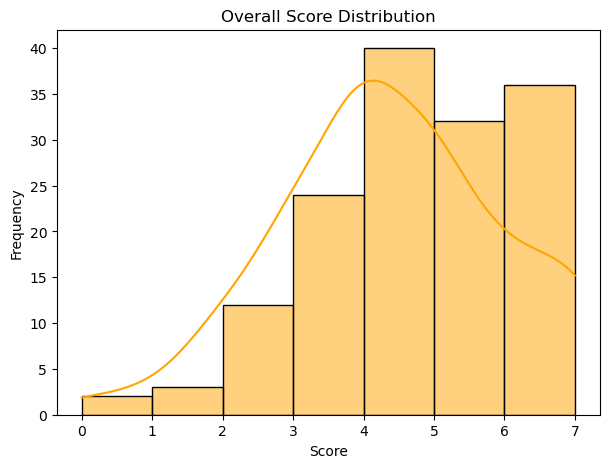

In [95]:
# Univariate Analysis
plt.figure(figsize=(7,5))
sns.histplot(df['Score'], bins=7, kde=True,color="orange")
plt.title("Overall Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

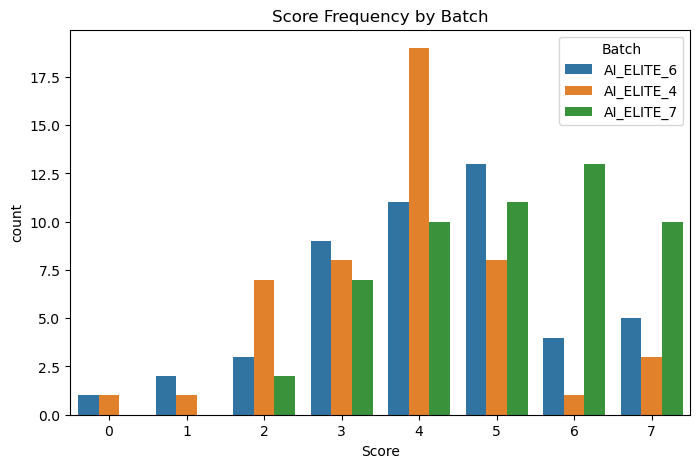

In [96]:
plt.figure(figsize=(8,5))
sns.countplot(x='Score', hue='Batch', data=df)
plt.title("Score Frequency by Batch")
plt.show()

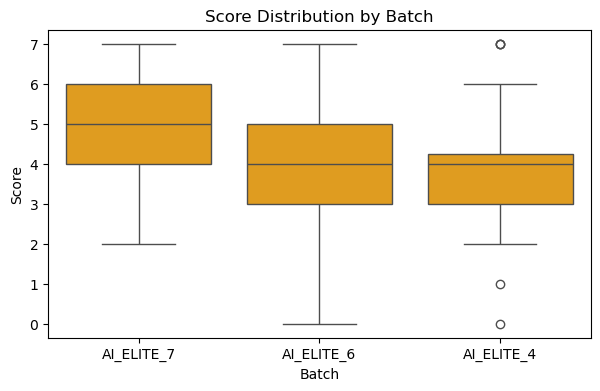

In [97]:
# Bivariate Analysis-Batch vs Score
plt.figure(figsize=(7,4))
sns.boxplot(x="Batch", y="Score", data=df,color="orange")
plt.title("Score Distribution by Batch")
plt.show()

In [98]:
batch_stats = df.groupby("Batch")["Score"].agg(
    Mean="mean",
    Median="median",
    Std="std",
    Min="min",
    Max="max"
).round(2)

batch_stats

,Mean,Median,Std,Min,Max
Batch,,,,,
AI_ELITE_4,3.79,4.0,1.44,0,7
AI_ELITE_6,4.23,4.0,1.64,0,7
AI_ELITE_7,5.06,5.0,1.45,2,7


In [ ]:
# Batch-wise Insights
################################ AI_ELITE_4
# Lower average
# Wider score spread
############################### AI_ELITE_6
# Moderate mean
# Mixed performance
############################### AI_ELITE_7
# Highest average
# Most consistent